In [1]:
import pandas as pd
import numpy as np

In [45]:
from nltk.corpus import stopwords
from sklearn.model_selection import KFold
from sklearn.feature_extraction.text import TfidfVectorizer

def kFoldCheck(data, yFeature, XFeature, classifier, k=3):
    kf = KFold(n_splits=k)
    accuracies = []
    
    data_X = data[XFeature].values
    data_y = data[yFeature].values
    
    for train, test in kf.split(data_X):
        train_x = [data_X[i] for i in train]
        train_y = [data_y[i] for i in train]
        
        test_x = [data_X[i] for i in test]
        test_y = [data_y[i] for i in test]
        
        vectorizer = TfidfVectorizer(max_features=3000, stop_words=stopwords.words('english'))
        train_x = vectorizer.fit_transform(train_x).toarray()
        
        test_x = vectorizer.transform(test_x).toarray()
        
        classifier.fit(train_x, train_y)
        
        prediction = classifier.predict(test_x)
        
        accuracy = (np.sum([1 if prediction[i] == test_y[i] else 0 for i in range(len(prediction))]))/len(prediction)
        accuracies.append(accuracy)
    
    return np.mean(accuracies)

# def kFoldCheck(trainDataX, trainDataY, vectorizerFeat, classifier, k=3):
#     kf = KFold(n_splits=k)
#     accuracies = []
    
#     for train, test in kf.split(trainDataX):
        
#         trainFoldX = np.array([trainDataX[i] for i in train])
#         trainFoldY = np.array([trainDataY[i] for i in train])

#         testFoldX = np.array([trainDataX[i] for i in test])
#         testFoldY = np.array([trainDataY[i] for i in test])

#         vectorizer = TfidfVectorizer(max_features=500, stop_words=stopwords.words('english'))
#         trainFoldX = vectorizer.fit_transform(trainFoldX[vectorizerFeat]).toarray()
#         testFoldX = vectorizer.transform(testFoldX[vectorizerFeat]).toarray()
        
#         classifier.fit(trainFoldX, trainFoldY)

#         prediction = classifier.predict(testFoldX)
#         accuracy = (np.sum([1 if prediction[i] == testFoldY[i] else 0 for i in range(len(prediction))]))/len(prediction)
#         accuracies.append(accuracy)
    
#     return np.mean(accuracies)

In [2]:
df = pd.read_csv("ExportedData/cleanCMURevenueAdjusted.tsv", sep="\t")

df["Languages"] = df["Languages"].apply(lambda x: eval(x))
df["Languages"] = df[df["Languages"].map(len) > 0]["Languages"]

df["Genres"] = df["Genres"].apply(lambda x: eval(x))
df["Genres"] = df[df["Genres"].map(len) > 0]["Genres"]

df["Countries"] = df["Countries"].apply(lambda x: eval(x))
df["Countries"] = df[df["Countries"].map(len) > 0]["Countries"]

df = df.dropna()
df.head()

,WikiID,Name,Revenue,ReleaseDate,Languages,Countries,Genres,Summary,Year,AdjustedRevenue
0,975900,Ghosts of Mars,14010832.0,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",2001.0,2.022468e+07
5,171005,Henry V,10161099.0,1989-11-08,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989.0,2.093678e+07
8,77856,Mary Poppins,102272727.0,1964-08-27,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",The film opens with Mary Poppins perched in a...,1964.0,8.429252e+08
12,156558,Baby Boy,29381649.0,2001-06-27,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",A young 20-year-old named Jody lives with his...,2001.0,4.241249e+07
22,261237,The Gods Must Be Crazy,34331783.0,1980,"[Afrikaans Language, English Language]",[South Africa],"[Adventure, Action/Adventure, Indie, World cin...",The film is a collision of three separate stor...,1980.0,1.066477e+08


In [3]:
len(df)

7295

In [4]:
englishes = set(['American English', 'English Language'])

englishOrNo = []

for language in df["Languages"]:
    counter = 0
    for lang in language:
        if lang in englishes:
            counter = 1
    englishOrNo.append(counter)

df["ForeignLanguage"] = englishOrNo
df.head()

,WikiID,Name,Revenue,ReleaseDate,Languages,Countries,Genres,Summary,Year,AdjustedRevenue,ForeignLanguage
0,975900,Ghosts of Mars,14010832.0,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",2001.0,2.022468e+07,1
5,171005,Henry V,10161099.0,1989-11-08,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989.0,2.093678e+07,1
8,77856,Mary Poppins,102272727.0,1964-08-27,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",The film opens with Mary Poppins perched in a...,1964.0,8.429252e+08,1
12,156558,Baby Boy,29381649.0,2001-06-27,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",A young 20-year-old named Jody lives with his...,2001.0,4.241249e+07,1
22,261237,The Gods Must Be Crazy,34331783.0,1980,"[Afrikaans Language, English Language]",[South Africa],"[Adventure, Action/Adventure, Indie, World cin...",The film is a collision of three separate stor...,1980.0,1.066477e+08,1


In [5]:
us = 'United States of America'
internationalFilms = []

for country in df["Countries"]:
    counter = 1
    for c in country:
        if c == us:
            counter = 0
    internationalFilms.append(counter)

df["International"] = internationalFilms
df.head()

,WikiID,Name,Revenue,ReleaseDate,Languages,Countries,Genres,Summary,Year,AdjustedRevenue,ForeignLanguage,International
0,975900,Ghosts of Mars,14010832.0,2001-08-24,[English Language],[United States of America],"[Thriller, Science Fiction, Horror, Adventure,...","Set in the second half of the 22nd century, th...",2001.0,2.022468e+07,1,0
5,171005,Henry V,10161099.0,1989-11-08,[English Language],[United Kingdom],"[Costume drama, War film, Epic, Period piece, ...",{{Plot|dateAct 1Act 2Act 3Act 4Act 5 Finally n...,1989.0,2.093678e+07,1,1
8,77856,Mary Poppins,102272727.0,1964-08-27,[English Language],[United States of America],"[Children's/Family, Musical, Fantasy, Comedy, ...",The film opens with Mary Poppins perched in a...,1964.0,8.429252e+08,1,0
12,156558,Baby Boy,29381649.0,2001-06-27,[English Language],[United States of America],"[Crime Fiction, Drama, Coming of age]",A young 20-year-old named Jody lives with his...,2001.0,4.241249e+07,1,0
22,261237,The Gods Must Be Crazy,34331783.0,1980,"[Afrikaans Language, English Language]",[South Africa],"[Adventure, Action/Adventure, Indie, World cin...",The film is a collision of three separate stor...,1980.0,1.066477e+08,1,1


In [6]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.2)

In [48]:
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer

rawPlots = train["Summary"]

plotVectorizer = TfidfVectorizer(max_features=3000, stop_words=stopwords.words('english'))
trainPlots = plotVectorizer.fit_transform(rawPlots).toarray()
testPlots = plotVectorizer.transform(test["Summary"]).toarray()

In [8]:
def testClassifier(trainX, trainY, testX, testY, classifier):
    classifier.fit(trainX, trainY)
    prediction = classifier.predict(testX)
    return sum(prediction == testY)/len(testY)

In [9]:
from sklearn.naive_bayes import GaussianNB

testClassifier(trainPlots, train["International"], testPlots, test["International"], GaussianNB())

0.6511309115832762

In [10]:
from sklearn.neighbors import KNeighborsClassifier

testClassifier(trainPlots, train["International"], testPlots, test["International"], KNeighborsClassifier())

0.8286497601096642

In [140]:
from sklearn.tree import DecisionTreeClassifier

testClassifier(trainPlots, train["International"], testPlots, test["International"], DecisionTreeClassifier())

0.7710760795065114

0.8594928032899246 accuracy for 100
0.8588074023303632 accuracy for 110
0.8594928032899246 accuracy for 120
0.8588074023303632 accuracy for 130
0.8574366004112406 accuracy for 140
0.8574366004112406 accuracy for 150
0.8574366004112406 accuracy for 160
0.8588074023303632 accuracy for 170
0.8588074023303632 accuracy for 180
0.8574366004112406 accuracy for 190


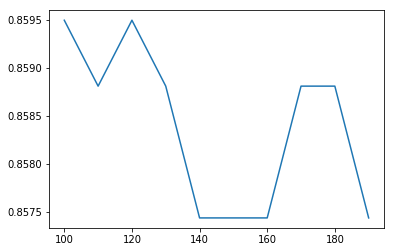

In [141]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
%matplotlib inline

ns = np.arange(100,200, 10)
accuracies = []

for n in ns:
    accuracy = testClassifier(trainPlots, train["International"], testPlots, test["International"], RandomForestClassifier(n_estimators=n))
    print(f"{accuracy} accuracy for {n}")
    accuracies.append(accuracy)
plt.plot(ns, accuracies)

0.8594928032899246 accuracy for 10
0.858122001370802 accuracy for 20
0.8485263879369431 accuracy for 30
0.8444139821795751 accuracy for 40
0.8505825908156271 accuracy for 50
0.8464701850582591 accuracy for 60
0.8519533927347498 accuracy for 70
0.8560657984921178 accuracy for 80
0.8540095956134338 accuracy for 90


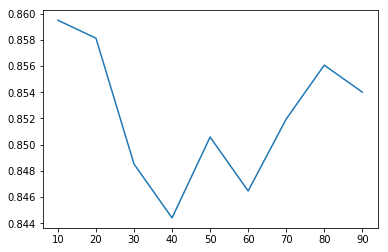

In [143]:
depths = np.arange(10,100, 10)
accuracies = []

for depth in depths:
    accuracy = testClassifier(trainPlots, train["International"], testPlots, test["International"], RandomForestClassifier(n_estimators=10, max_depth=depth))
    print(f"{accuracy} accuracy for {depth}")
    accuracies.append(accuracy)
plt.plot(depths, accuracies)

In [144]:
testClassifier(trainPlots, train["International"], testPlots, test["International"], RandomForestClassifier(n_estimators=120, max_depth=10))

0.8588074023303632

0.8553803975325566 for 10
0.8519533927347498 for 20
0.8567511994516792 for 30
0.8498971898560658 for 40
0.8457847840986977 for 50
0.8444139821795751 for 60
0.8464701850582591 for 70
0.8416723783413297 for 80
0.8382453735435229 for 90


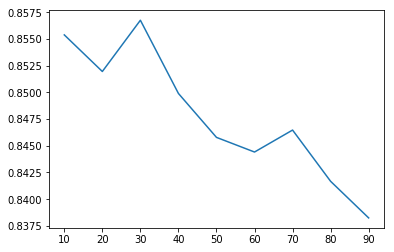

In [145]:
from sklearn.ensemble import AdaBoostClassifier

accuracies = []
ns = np.arange(10,100, 10)

for n in ns:
    accuracy = testClassifier(trainPlots, train["International"], testPlots, test["International"], AdaBoostClassifier(n_estimators=n))
    print(f"{accuracy} for {n}")
    accuracies.append(accuracy)
plt.plot(ns, accuracies)

In [123]:
countries = set()
counter = 0
for ls in df["Countries"]:
    value = 0
    for country in ls:
        if country == us:
            value = 1
    counter += value
counter/len(df)

0.84893762851268

In [46]:
from sklearn.ensemble import RandomForestClassifier

# kFoldCheck(df.drop("International", axis=1), df["International"], "International", RandomForestClassifier(n_estimators=120, max_depth=10))
kFoldCheck(df, "International", "Summary", RandomForestClassifier(n_estimators=120, max_depth=10))

0.8504455989701732

In [49]:
rf = RandomForestClassifier(n_estimators=120, max_depth=10)
rf.fit(trainPlots, train["International"])
predictions = rf.predict(testPlots)
set(predictions)

{0, 1}

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(trainPlots, train["International"])
predictions = knn.predict(testPlots)

print(sum(predictions == test["International"])/len(predictions))
print(set(predictions))

{0, 1}

In [44]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(trainPlots, train["International"])
predictions = dt.predict(testPlots)

print(sum(predictions == test["International"])/len(predictions))
print(set(predictions))

0.7676490747087046
{0, 1}


### Finding parameters with KFold cross validation

accuracy for 100: 0.8470185564564434
accuracy for 200: 0.848389903440213
accuracy for 300: 0.8490754359804282
accuracy for 400: 0.8529132116593416


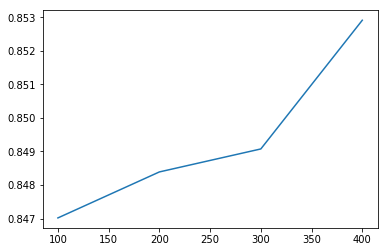

In [52]:
from sklearn.ensemble import AdaBoostClassifier
import matplotlib.pyplot as plt
%matplotlib inline

ns = np.arange(100, 500, 100)
accuracies = []

for n in ns:
    acc = kFoldCheck(df, "International", "Summary", AdaBoostClassifier(n_estimators=n))
    accuracies.append(acc)
    print(F"accuracy for {n}: {acc}")

plt.plot(ns, accuracies)

accuracy for 0.1: 0.852228186545137
accuracy for 0.2: 0.8515425412435862
accuracy for 0.30000000000000004: 0.8507201728225335
accuracy for 0.4: 0.8538725851032353
accuracy for 0.5: 0.854009646506744
accuracy for 0.6: 0.853872641483903
accuracy for 0.7000000000000001: 0.8540097592680796
accuracy for 0.8: 0.8540097592680796
accuracy for 0.9: 0.8533244522505359


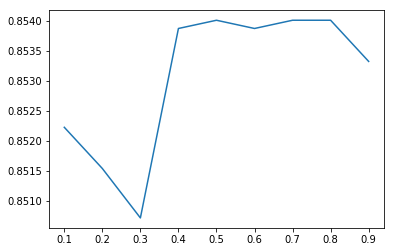

In [65]:
ns = np.arange(100, 500, 100)
lrs = np.arange(0.1, 1, 0.1)

accuracies = []

for lr in lrs:
    acc = kFoldCheck(df, "International", "Summary", AdaBoostClassifier(n_estimators=10, learning_rate=lr))
    accuracies.append(acc)
    print(F"accuracy for {lr}: {acc}")

plt.plot(lrs, accuracies)

In [67]:
kFoldCheck(df, "International", "Summary", AdaBoostClassifier(n_estimators=400, learning_rate=0.5))

0.8625078481889629

In [53]:
from sklearn.naive_bayes import BernoulliNB

kFoldCheck(df, "International", "Summary", BernoulliNB())

0.6603163429063197

In [54]:
from sklearn.naive_bayes import MultinomialNB

kFoldCheck(df, "International", "Summary", MultinomialNB())

0.864701845497124

/Users/eoin/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/eoin/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/eoin/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


accuracy for 0.0: 0.8715562124279229
accuracy for 0.1: 0.870048029563316
accuracy for 0.2: 0.8690884869774189
accuracy for 0.30000000000000004: 0.8678548215845042
accuracy for 0.4: 0.8673064632091334
accuracy for 0.5: 0.8667581612144305
accuracy for 0.6000000000000001: 0.8664839256460773
accuracy for 0.7000000000000001: 0.8660726850548831
accuracy for 0.8: 0.8652502038724948
accuracy for 0.9: 0.8649760246848096
accuracy for 1.0: 0.864701845497124


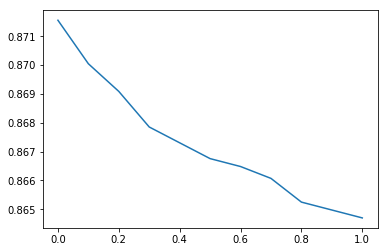

In [58]:
import matplotlib.pyplot as plt
%matplotlib inline

alphas = np.arange(0,1.1,0.1)
accuracies = []

for alpha in alphas:
    acc = kFoldCheck(df, "International", "Summary", MultinomialNB(alpha=alpha))
    accuracies.append(acc)
    print(F"accuracy for {alpha}: {acc}")

plt.plot(alphas, accuracies)

In [59]:
kFoldCheck(df, "International", "Summary", MultinomialNB(alpha=0))

/Users/eoin/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/eoin/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)
/Users/eoin/anaconda/lib/python3.6/site-packages/sklearn/naive_bayes.py:480: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


0.8715562124279229

In [60]:
kFoldCheck(df, "International", "Summary", MultinomialNB(alpha=0.005))

0.8712820332402377

In [73]:
from sklearn.ensemble import GradientBoostingClassifier

gb = GradientBoostingClassifier()
gb.fit(trainPlots, train["International"])
pred = gb.predict(testPlots)
sum(pred == testPlots["International"])/len(pred)

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [74]:
sum(pred == test["International"])/len(pred)

0.8492117888965045

In [75]:
from sklearn.ensemble import BaggingClassifier

bg = BaggingClassifier()
bg.fit(trainPlots, train["International"])
pred = bg.predict(testPlots)
sum(pred == test["International"])/len(pred)

0.8457847840986977

### Language

In [71]:
kFoldCheck(df, "ForeignLanguage", "Summary", MultinomialNB(alpha=1e-10))

0.9361208161034013